<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Study-of-Apartment-Sale-Listings" data-toc-modified-id="Study-of-Apartment-Sale-Listings-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Study of Apartment Sale Listings</a></span><ul class="toc-item"><li><span><a href="#Studying-Data-from-the-File" data-toc-modified-id="Studying-Data-from-the-File-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Studying Data from the File</a></span><ul class="toc-item"><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li></ul></li><li><span><a href="#Data-Preprocessing" data-toc-modified-id="Data-Preprocessing-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Preprocessing</a></span><ul class="toc-item"><li><span><a href="#Data-type-replacement" data-toc-modified-id="Data-type-replacement-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Data type replacement</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li><li><span><a href="#Calculations-and-Adding-Results-to-the-Table" data-toc-modified-id="Calculations-and-Adding-Results-to-the-Table-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Calculations and Adding Results to the Table</a></span><ul class="toc-item"><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Exploratory Data Analysis</a></span><ul class="toc-item"><li><span><a href="#Studying-Area,-Price,-Number-of-Rooms,-and-Ceiling-Height" data-toc-modified-id="Studying-Area,-Price,-Number-of-Rooms,-and-Ceiling-Height-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Studying Area, Price, Number of Rooms, and Ceiling Height</a></span></li><li><span><a href="#Analysis-of-Apartment-Sale-Time" data-toc-modified-id="Analysis-of-Apartment-Sale-Time-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Analysis of Apartment Sale Time</a></span></li><li><span><a href="#Removal-of-Rare-and-Outlying-Values" data-toc-modified-id="Removal-of-Rare-and-Outlying-Values-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Removal of Rare and Outlying Values</a></span></li><li><span><a href="#Studying-the-Dependence-of-Price-on-Parameters" data-toc-modified-id="Studying-the-Dependence-of-Price-on-Parameters-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Studying the Dependence of Price on Parameters</a></span></li><li><span><a href="#Calculating-the-average-price-per-square-meter-in-the-10-localities-with-the-highest-number-of-listings." data-toc-modified-id="Calculating-the-average-price-per-square-meter-in-the-10-localities-with-the-highest-number-of-listings.-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Calculating the average price per square meter in the 10 localities with the highest number of listings.</a></span></li><li><span><a href="#Identifying-the-Area-That-Falls-Within-the-Center" data-toc-modified-id="Identifying-the-Area-That-Falls-Within-the-Center-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Identifying the Area That Falls Within the Center</a></span></li><li><span><a href="#Analysis-of-the-Apartment-Segment-in-the-Center" data-toc-modified-id="Analysis-of-the-Apartment-Segment-in-the-Center-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span>Analysis of the Apartment Segment in the Center</a></span></li></ul></li><li><span><a href="#General-Conclusion" data-toc-modified-id="General-Conclusion-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>General Conclusion</a></span></li></ul></div>

# Study of Apartment Sale Listings

In this project, data from the Yandex.Real Estate service will be used — an archive of apartment sale listings in St. Petersburg and neighboring settlements over several years. The goal is to learn how to determine the market value of real estate properties. The task is to identify parameters that will allow the creation of an automated system: it will detect anomalies and fraudulent activity.

For each apartment listed for sale, there are two types of data available. The first type is provided by the user, while the second is automatically derived from cartographic data. For example, the distance to the city center, airport, nearest park, and body of water. 

## Studying Data from the File

First, let's open the file and inspect the general information

In [1]:
# Importing pandas library
import pandas as pd
import numpy as np
# Importing libraries for plotting histograms
import matplotlib.pyplot as plt

In [2]:
# Opening the file using the try-except method
try:
    df = pd.read_csv('real_estate_data.csv')
except:
    print('The required file does not exist!')    
# Displaying the first 5 rows of the table
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 1 columns):
 #   Column                                                                                                                                                                                                                                                                                           Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                                                                                           --------------  ----- 
 0   total_images	last_price	total_area	first_day_exposition	rooms	ceiling_height	floors_total	living_area	floor	is_apartment	studio	open_plan	kitchen_area	balcony	locality_name	airports_nearest	cityCenters_nearest	parks_around3000	parks_nearest	ponds_around

None

In [3]:
# Делим строку со слипшимися названиями колонок на разные столбцы
new_df = df['total_images	last_price	total_area	first_day_exposition	'
'rooms	ceiling_height	floors_total	living_area	floor	'
'is_apartment	studio	open_plan	kitchen_area	balcony	locality_name	'
'airports_nearest	cityCenters_nearest	parks_around3000	parks_nearest	'
'ponds_around3000	ponds_nearest	days_exposition'].str.split('\t',expand=True)
display(new_df)

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.7,16.0,51.0,8,,...,25.0,,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,,11.0,18.6,1,,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,,0.0,,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,,5.0,34.3,4,,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,,14.0,,9,,...,,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,,...,41.0,,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.7,5.0,73.3,3,,...,13.83,,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,
23695,14,3100000.0,59.0,2018-01-15T00:00:00,3,,5.0,38.0,4,,...,8.5,,Тосно,,,,,,,45.00000000000001
23696,18,2500000.0,56.7,2018-02-11T00:00:00,2,,3.0,29.7,1,,...,,,село Рождествено,,,,,,,
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.0,17.0,,12,,...,23.3,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


In [4]:
# Переименование колонок
new_df.columns=['total_images','last_price','total_area', 'first_day_exposition', 'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor', 'is_apartment', 'studio', 'open_plan', 'kitchen_area','balcony', 'locality_name', 'airports_nearest',  'cityCenters_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000','ponds_nearest', 'days_exposition']
display(new_df.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.7,16.0,51.0,8,,...,25.0,,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,,11.0,18.6,1,,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,,0.0,,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,,5.0,34.3,4,,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,,14.0,,9,,...,,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,,...,41.0,,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [5]:
# translation_map = {
#     'Санкт-Петербург': 'Saint Petersburg',
#     'посёлок Шушары': 'Shushary settlement',
#     'деревня Кудрово': 'Kudrovo village'
# }

# # Function to apply the translation based on the mapping
# def apply_translation(place):
#     return translation_map.get(place, place)  # returns the original if a translation isn't found

# # Apply the translation to your dataframe
# new_df['locality_name'] = new_df['locality_name'].apply(apply_translation)

new_df.to_csv('new_data.csv', index=False)


In [6]:
# Opening the file using the try-except method
try:
    df = pd.read_csv('new_data.csv')
except:
    print('The required file does not exist!')    
# Displaying the first 5 rows of the table
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

None

In the provided table, there are 22 columns. Various data types are represented here: 3 data types of int64, 14 types of float64, 3 types of object, and 2 types of bool.

According to the data documentation:

* `airports_nearest` — distance to the nearest airport in meters (m)
* `balcony` — number of balconies
* `ceiling_height` — ceiling height (m)
* `cityCenters_nearest` — distance to the city center (m)
* `days_exposition` — number of days the ad was posted (from publication to removal)
* `first_day_exposition` — publication date
* `floor` — floor number
* `floors_total` — total number of floors in the building
* `is_apartment` — whether the property is an apartment (boolean type)
* `kitchen_area` — kitchen area in square meters (m²)
* `last_price` — price at the time of removal from publication
* `living_area` — living area in square meters (m²)
* `locality_name` — name of the locality
* `open_plan` — open floor plan (boolean type)
* `parks_around3000` — number of parks within a 3 km radius
* `parks_nearest` — distance to the nearest park (m)
* `ponds_around3000` — number of ponds within a 3 km radius
* `ponds_nearest` — distance to the nearest pond (m)
* `rooms` — number of rooms
* `studio` — studio apartment (boolean type)
* `total_area` — total apartment area in square meters (m²)
* `total_images` — number of apartment photos in the ad

Even at first glance, it's evident that there are missing values in the data. We'll try to address this during data preprocessing.

### Conclusion

Each row in the table contains the primary parameters that can assist in determining the market value of real estate properties in St. Petersburg and the surrounding region: area, price, number of rooms, and ceiling height. Also, parameters such as the floor number, distance from the city center, and the ad's publication date can significantly influence the property's price and how quickly it was sold.

In the following sections, we will attempt to fill in all the missing values where appropriate and investigate the possible reasons that could have led to these gaps in the data.

# Data Preprocessing

Initially, it's essential to calculate how many missing values are present in the table. For this purpose, the `isna()` method can be used.

In [7]:
df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


In [8]:
# Counting the number of missing values
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In the columns `airports_nearest`, `parks_around3000`, `parks_nearest`, `ponds_around3000`, and `ponds_nearest`, a significant number of missing values can be observed. Fortunately, not all missing values impact the study, so in these columns, some of the missing values can be replaced with a clear indication, while the rest can be left as is.

However, the same approach cannot be applied to the columns `ceiling_height`, `floors_total`, `living_area`, `kitchen_area`, `balcony`, `cityCenters_nearest`, and `days_exposition`, the data from which are essential for answering our questions. In a real-world scenario, it would be beneficial to ascertain the cause of the missing values and recover the data. 
But since we lack that capability, it's necessary to fill these gaps with explicit indications and also assess how much they might affect the calculations.

With the `is_apartment` column, things are not so straightforward. There are many missing values, and it's impossible to accurately infer what the data might be without potentially skewing the results of the analysis. Therefore, we'll leave the missing values unfilled.

Since there aren't many missing values in the `locality_name` column, we'll replace them with the value `unknown`.

In [9]:
# Fill the gaps in column 'balcony' to 0
df['balcony'] = df['balcony'].fillna(0)
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

If the number of balconies in an apartment is not specified, it's likely that there are none. We can replace the missing values with 0. The same situation could be applied to apartments.

Now, let's address the kitchen area. If the property is a studio, we can conclusively fill the missing values with 0, as in studios the room and the kitchen are combined into one.

In [10]:
# Let's count how many such apartments there are
len(df[(np.isnan(df.kitchen_area)) & (df['studio']== True)])

149

In [11]:
# Replace the missing values with 0 for properties that are studios
df['kitchen_area'] = df['kitchen_area'].mask(df['studio'] == True, 0)

Also, if the number of rooms specified is 0, then the apartment is also considered a studio.

In other cases, we'll try using median values to minimize errors in further calculations.

Since the kitchen area depends on the number of rooms and the total area, we can divide the average kitchen area by the average total area (depending on the number of rooms) and then multiply the entire area by the resulting coefficient.

In [12]:
# Function to group data by the first column and find the average value of the second
def trandform_func(col1, col2):
    return df.groupby(col1)[col2].transform('median')

In [13]:
# Function to fill missing values in column col with value
def fillna_func(col, value):
    df[col] = df[col].fillna(value)
    return df[col] 

In [14]:
# Let's group the area of the kitchen by the number of rooms
kitchen_rooms = trandform_func('rooms', 'kitchen_area')
# Let's group the total  area of the kitchen by the number of rooms
total_area_rooms = trandform_func('rooms', 'total_area')
# Filling the gaps in the column 'kitchen_area'
fillna_func('kitchen_area', df['total_area'] * kitchen_rooms / total_area_rooms)
display(df['kitchen_area'])

0        25.000000
1        11.000000
2         8.300000
3        20.691781
4        41.000000
           ...    
23694    13.830000
23695     8.500000
23696     9.414340
23697    23.300000
23698     9.000000
Name: kitchen_area, Length: 23699, dtype: float64

Let's do the same with a column `living_area` which is also depending on the number of rooms and the total area of the apartment. 

In [15]:
# Let's group the area of the living area by the number of rooms
group_living = trandform_func('rooms', 'living_area')
# Filling the gaps in the column 'living_area'
fillna_func('living_area', df['total_area'] * group_living  / total_area_rooms)
display(df.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.000000,8,NaN,...,25.000000,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.600000,1,NaN,...,11.000000,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.300000,4,NaN,...,8.300000,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,98.013699,9,NaN,...,20.691781,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.000000,13,NaN,...,41.000000,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


You can't simply fill the `floors_total` column with the median value, because this value might be lower than the value in the `floor` column.

Therefore, let's group the total number of floors based on the floor where the real estate object is located.

In [16]:
# Group the number of floors in a building by the floor where the apartment is located
group_floor = trandform_func('floor', 'floors_total')
# Fill in the missing values in the 'floors_total' column
fillna_func('floors_total', group_floor)

0        16.0
1        11.0
2         5.0
3        14.0
4        14.0
         ... 
23694     5.0
23695     5.0
23696     3.0
23697    17.0
23698     5.0
Name: floors_total, Length: 23699, dtype: float64

The `ceiling_height` column might depend on the number of floors, so we'll fill in the missing values with the median ceiling height based on the building's number of floors.

In [17]:
# Group ceiling height by the number of floors in a building
ceiling = trandform_func('floors_total', 'ceiling_height')
# Fill in the missing values in the 'ceiling_height' column
fillna_func('ceiling_height', ceiling)
#In case some floors appear in our table only once, 
#we will fill them with the median value for the entire table
fillna_func('ceiling_height', df['ceiling_height'].median())

0        2.70
1        2.75
2        2.55
3        2.60
4        3.03
         ... 
23694    3.70
23695    2.55
23696    2.80
23697    3.00
23698    2.50
Name: ceiling_height, Length: 23699, dtype: float64

Now, let's deal with those columns that directly depend on the location of the object under consideration.

In [18]:
#Create a list of columns where we'll group values
#by the 'locality_name' column and replace missing 
#values with the median value
list_of_columns =['airports_nearest', 'cityCenters_nearest', 'parks_around3000', 'parks_nearest',
                 'ponds_around3000', 'ponds_nearest']
fillna_func(list_of_columns, trandform_func('locality_name', list_of_columns))

,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest
0,18863.0,16028.0,1.0,482.0,2.0,755.0
1,12817.0,18603.0,0.0,NaN,0.0,584.5
2,21741.0,13933.0,1.0,90.0,2.0,574.0
3,28098.0,6800.0,2.0,84.0,3.0,234.0
4,31856.0,8098.0,2.0,112.0,1.0,48.0
...,...,...,...,...,...,...
23694,24665.0,4232.0,1.0,796.0,3.0,381.0
23695,NaN,NaN,NaN,NaN,NaN,NaN
23696,NaN,NaN,NaN,NaN,NaN,NaN
23697,39140.0,10364.0,2.0,173.0,3.0,196.0


<div class="alert alert-success">
Columns with parks, ponds, and distance to the airport are filled automatically based on geolocation. Missing values can be left as they are since there isn't enough data (e.g., precise geolocation) for a proper replacement. Such an issue should be reported to the database developers to avoid further complications.
    <div>

Let's see if there are any missing values left in our table.

In [19]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name              49
airports_nearest         5394
cityCenters_nearest      5394
parks_around3000         5394
parks_nearest            6032
ponds_around3000         5394
ponds_nearest            5518
days_exposition          3181
dtype: int64

The number of missing values in the `parks_nearest` and p`onds_nearest` columns has decreased by three times, but still, it accounts for almost 20% of all data. Missing values in columns `airports_nearest`, `parks_around3000`, `parks_nearest`, `ponds_around3000`, and `ponds_nearest` can be filled using Yandex.Maps, but these data aren't that crucial to us, so they can be left untouched.

However, the columns `cityCenters_nearest` and `days_exposition` are essential for further analysis, but we can't simply fill them with median values because we can't conclusively deduce the relationship between an object's proximity to the center and the number of days the listing was posted. Hence, we'll try to assess the impact of these missing values.

## Data type replacement

Per the task requirements, the columns `is_apartment`, `open_plan`, and `studio` have a boolean data type, and in the columns `last_price`, `balcony`, `floor`, and `floors_total` it would be good to change the data type to `int`.

In [20]:
# Function to replace the floating-point data type with a numeric one
def change_type(col, type_of_col):
    df[col] = df[col].astype(type_of_col)
    return df[col]

In [21]:
# Changing the value types in the columns 'last_price', 'balcony', 'floor', 'floors_total' to int
list_of_columns = ['last_price', 'balcony', 'floor', 'floors_total']
change_type(list_of_columns, 'int')

,last_price,balcony,floor,floors_total
0,13000000,0,8,16
1,3350000,2,1,11
2,5196000,0,4,5
3,64900000,0,9,14
4,10000000,0,13,14
...,...,...,...,...
23694,9700000,0,3,5
23695,3100000,0,4,5
23696,2500000,0,1,3
23697,11475000,2,12,17


Converting the value type of the `first_day_exposition` column to  `datetime`.

In [22]:
# Converting the value type of the 'first_day_exposition' column to datetime
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y.%m.%dT%H:%M:%S')

In [23]:
# Converting the value types of columns 'open_plan', 'studio' to bool
list_of_columns = ['open_plan', 'studio']
df[list_of_columns] = df[list_of_columns].replace('False', '')
change_type(list_of_columns, 'bool')

,open_plan,studio
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
23694,False,False
23695,False,False
23696,False,False
23697,False,False


In [24]:
# Checking unique values in the 'is_apartment' column
df['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

The `is_apartment` column is not that straightforward since there are many missing values, and it's unclear without skewing analysis results what the data might be. Thus, we'll leave the missing values unfilled.

In [25]:
# Since the 'days_exposition' column has missing values, 
#we round to the nearest whole number and convert to type Int64
df['days_exposition'] = round(df['days_exposition'])
df['days_exposition'] = df['days_exposition'].astype('Int64')

## Conclusion

* As per the task requirements, logical substitutions can be made for some missing values. For instance, if a person did not specify the number of balconies — most likely, there aren't any. Thus, missing values in the `balcony` column were replaced with 0;
* Missing values in the `ceiling_height` columns were grouped by the number of floors, and `floors_total` by the floor where the real estate object is located, and then replaced with median values;
* Missing values in the `living_area`, `kitchen_area` columns were grouped by the number of rooms and total area, then replaced with values equal to the product of the total area times the coefficient ratio of kitchen area and living area to the total area, respectively;
* Missing values in the columns `days_exposition`, `airports_nearest`, `cityCenters_nearest`, `parks_around3000`, `parks_nearest`, `ponds_around3000`, `ponds_nearest`, `airports_nearest` were left untouched since they can't be definitively grouped with other parameters and filled with median values.

Besides filling in the missing values, data types were replaced:

* In the columns `last_price`, `floors_total`, and `balcony`  to integer since the price in the table has a non-zero fractional part, and the number of floors and balconies generally cannot be a non-integer;
* In the columns `studio` and `open_plan` to `bool` as per task requirements.

In other columns, the value type wasn't changed since, for more accurate calculations, it's better to use the floating-point data type and round off the final result.

# Calculations and Adding Results to the Table

Let's calculate the price per square meter.

In [26]:
# Calculate the price per square meter by dividing the price by the total area.
df['price_per_square_metre'] = (df['last_price'] / df['total_area'])

Let's add to the table the day of the week, month, and year of the listing's publication.

In [27]:
# Adding the year to the table.
df['day_of_exposition'] = df['first_day_exposition'].dt.dayofweek
# the month
df['month_of_exposition'] = df['first_day_exposition'].dt.month
# and the day of the listing's publication
df['year_of_exposition'] = df['first_day_exposition'].dt.year

Also, as required by the task, it's necessary to add the floor the apartment is on; options — first, last, other.

In [28]:
#Create a function that takes a row of the table as input.
def building_floor(row):
    # assign the variable floor to the floor of the apartment
    floor = row['floor']
    # and the variable floors_total to the total number of floors in the building
    floors_total = row['floors_total']
    # if the floor is 1
    if floor == 1:
        return 'first'
    # if the floor equals the total number of floors in the building
    elif floor == floors_total:
        return 'last'
    # otherwise
    else:
        return 'other'

In [29]:
# Apply the function to the table.
df['flat_floor'] = df.apply(building_floor, axis = 1)

What remains is to add the ratio of living area to total area, as well as the ratio of kitchen area to total area.

In [30]:
# Find the ratio of living area to total area.
df['living_to_total_area'] = df['living_area'] / df['total_area']
# and the ratio of kitchen area to total area.
df['kitchen_to_total_area'] = df['kitchen_area'] / df['total_area']

In [31]:
# Display the table with new data.
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_square_metre,day_of_exposition,month_of_exposition,year_of_exposition,flat_floor,living_to_total_area,kitchen_to_total_area
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.000000,8,NaN,...,2.0,755.0,<NA>,120370.370370,3,3,2019,other,0.472222,0.231481
1,7,3350000,40.4,2018-12-04,1,2.75,11,18.600000,1,NaN,...,0.0,584.5,81,82920.792079,1,12,2018,first,0.460396,0.272277
2,10,5196000,56.0,2015-08-20,2,2.55,5,34.300000,4,NaN,...,2.0,574.0,558,92785.714286,3,8,2015,other,0.612500,0.148214
3,0,64900000,159.0,2015-07-24,3,2.60,14,98.013699,9,NaN,...,3.0,234.0,424,408176.100629,4,7,2015,other,0.616438,0.130137
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.000000,13,NaN,...,1.0,48.0,121,100000.000000,1,6,2018,other,0.320000,0.410000


## Conclusion

As a result, the following were added to the table:

* price per square meter;
* the day of the week, month, and year of the listing's publication;
* the floor of the apartment; options — first, last, other;
* the ratio of living area to total area, as well as the ratio of kitchen area to total area.

The data obtained will help to conduct a more accurate exploratory data analysis and minimize errors due to missing data.

# Exploratory Data Analysis

## Studying Area, Price, Number of Rooms, and Ceiling Height

In [32]:
# A function for the parameter, which plots 
#a histogram based on the column values of value
#within first_border and last_border with the 
#number of bins specified by number_of_bins

def plot_hist(value, number_of_bins, first_boarder, last_boarder ):
    graph = df[value].hist(range = (first_boarder, last_boarder),bins = number_of_bins)
    plt.show()
    return df[value].describe(), graph

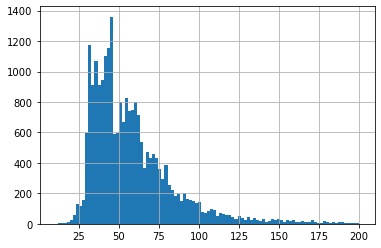

(count    23699.000000
 mean        60.348651
 std         35.654083
 min         12.000000
 25%         40.000000
 50%         52.000000
 75%         69.900000
 max        900.000000
 Name: total_area, dtype: float64,
 <AxesSubplot:>)

In [33]:
# Plotting the graph for total area
plot_hist('total_area', 100, 10, 200) 

The price graph represents a normal distribution, with no suspicious spikes observed.

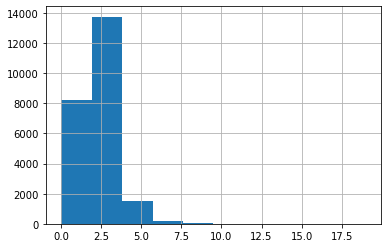

(count    23699.000000
 mean         2.070636
 std          1.078405
 min          0.000000
 25%          1.000000
 50%          2.000000
 75%          3.000000
 max         19.000000
 Name: rooms, dtype: float64,
 <AxesSubplot:>)

In [34]:
# Plotting the graph for the number of rooms
plot_hist('rooms',10, 0, 19)  

The graph for the number of rooms is reasonable - the majority of real estate objects have from 1 to 3 rooms. However, there are odd values with the number of rooms equal to 0. A kitchen can be missing, but not a room. Such values need to be removed.

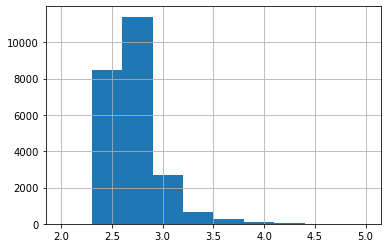

(count    23699.000000
 mean         2.735671
 std          0.994293
 min          1.000000
 25%          2.550000
 50%          2.650000
 75%          2.750000
 max        100.000000
 Name: ceiling_height, dtype: float64,
 <AxesSubplot:>)

In [35]:
# Plotting the graph for ceiling height
plot_hist('ceiling_height',10, 2, 5)  

The ceiling height is within the limits of 2.2 to 3 meters, which is a normal height for ceilings in residential and office buildings. A maximum ceiling price of 100 meters is possible, but for our analysis, it's better to remove it so that it does not affect the average indicators.

**Conclusion**

* It's evident from the histogram of the area that 75% of all values are less than 70 sq.m., which means that values greater than ~200 are rare, and values at 900 sq.m. are outliers.
* The price histogram looks quite acceptable, except that the price of the majority of real estate objects (~75%) is less than 6,800,000 USD.
* The histogram of the number of rooms includes apartments with a zero value. This should not be the case, so such values need to be removed.
* The ceiling height also does not raise particular doubts, except for the height of 100 meters. Such values are rare and can be safely removed so as not to influence further research.

## Analysis of Apartment Sale Time

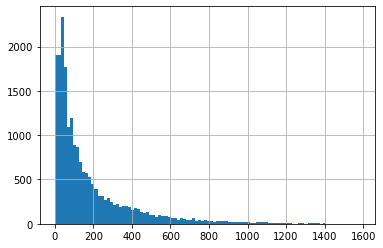

(count    20518.000000
 mean       180.888634
 std        219.727988
 min          1.000000
 25%         45.000000
 50%         95.000000
 75%        232.000000
 max       1580.000000
 Name: days_exposition, dtype: float64,
 <AxesSubplot:>)

In [36]:
# Building a graph of apartment sale time
plot_hist('days_exposition', 100, 0, 1580)

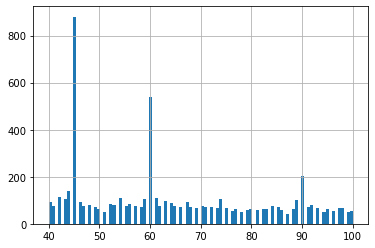

(count    20518.000000
 mean       180.888634
 std        219.727988
 min          1.000000
 25%         45.000000
 50%         95.000000
 75%        232.000000
 max       1580.000000
 Name: days_exposition, dtype: float64,
 <AxesSubplot:>)

In [37]:
# Changing the limits
plot_hist('days_exposition', 100, 40, 100)

<AxesSubplot:>

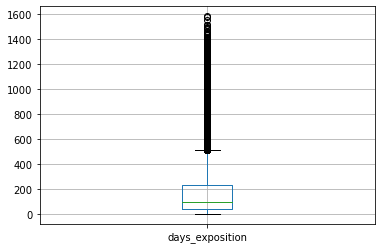

In [38]:
# Evaluating outliers in the 'days_exposition' column
df.boxplot(column = 'days_exposition')

<AxesSubplot:xlabel='first_day_exposition'>

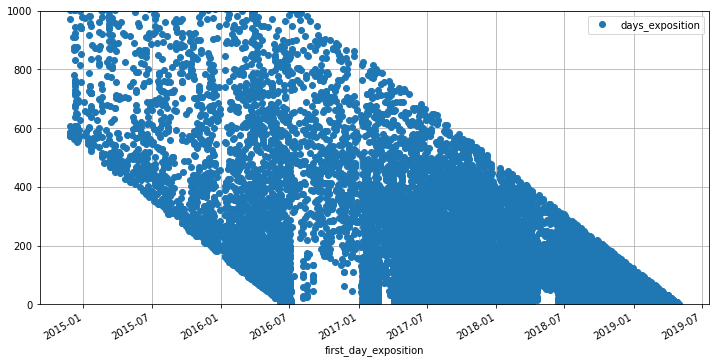

In [39]:
# Let's see how the day of posting is related 
#to the number of days the ad was published
df.plot(x = 'first_day_exposition', y = 'days_exposition', style = 'o', ylim = (0, 1000), grid = True, figsize = (12, 6))

It can be clearly seen that from the beginning of 2015 to mid-2019, the number of days significantly decreased. However, there is also a strange drop in data - from July 2016 to January 2017.

In [40]:
# Let's assess the data drop relative to the total amount of data
len(df.query('first_day_exposition >= "2016-07-01" & first_day_exposition <= "2017-01-01"')) / df.shape[0]

0.031056162707287227

**Conclusion**

* A normal period for selling an item ranges from 45 to 232 days, according to the box plot. Accordingly, abnormally fast sales will be less than 45 days, and slow sales will be more than 232 days.
* The average value is twice the median (`average` = 180.888634, `median` = 95.000000), which means that outliers affect the data, so it is necessary to somehow limit them. Since the "whiskers" of the plot start at around 500 days, this data can be removed.
* There are suspicious spikes at 45, 60, and 90 days of publication. These, as per the task condition, will need to be removed.
* It can also be seen that from the beginning of 2015 to mid-2019, the number of days for publication significantly decreased - possibly, internet resources have become more popular over time, so the number of days began to decrease. However, there is also a strange drop in data - from July 2016 to January 2017. There might have been some problems in the real estate market or a problem with the data itself.

## Removal of Rare and Outlying Values

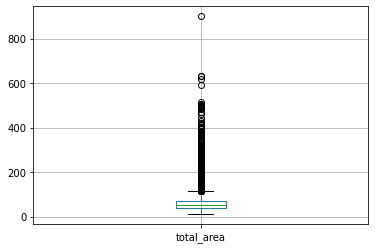

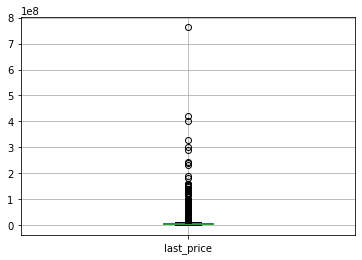

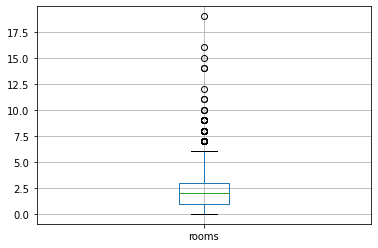

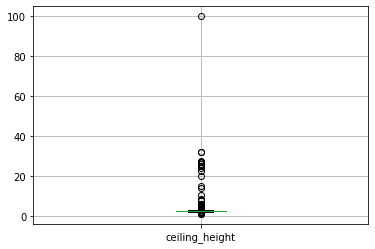

In [41]:
# List of values under study
list_of_columns = ['total_area','last_price', 'rooms', 'ceiling_height' ]
# Building box plots to observe
for value in list_of_columns:
    df.boxplot(column = value)
    plt.show()

In [42]:
#We will limit the area to 180 sq.m., as real estate 
#of larger area is quite rare
df = df[(df['total_area'] <= 180)]

#We will limit the price, as apartments costing 
#more than 15000000 make up less than 1% of all data
df = df[(df['last_price'] <= 15000000) & (df['last_price'] >= 900000)]

#We will discard zero number of rooms and numbers greater than 6
df = df[(df['rooms'] <= 6 ) & (df['rooms'] != 0 )]

#We will delete ceilings less than 2.3 meters and higher than 3
df = df[(df['ceiling_height'] >= 2.3 ) & (df['ceiling_height'] <= 3 )]

#We will remove the outlying values of 45, 60, and 90 days in the days of ad publication
df = df[(~df['days_exposition'].isin([45, 60, 90])) ]
df = df[(df['days_exposition'] < 800 )]

In [43]:
list_of_columns = ['total_area','last_price', 'rooms', 'ceiling_height', 'days_exposition']
for value in list_of_columns:
    print(value, df[value].describe())
    print()

total_area count    16472.000000
mean        53.331265
std         19.625038
min         12.000000
25%         39.000000
50%         48.600000
75%         63.000000
max        178.000000
Name: total_area, dtype: float64

last_price count    1.647200e+04
mean     4.940061e+06
std      2.433000e+06
min      9.000000e+05
25%      3.350000e+06
50%      4.370000e+06
75%      5.900000e+06
max      1.500000e+07
Name: last_price, dtype: float64

rooms count    16472.000000
mean         1.922353
std          0.888669
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: rooms, dtype: float64

ceiling_height count    16472.000000
mean         2.657479
std          0.140241
min          2.300000
25%          2.550000
50%          2.600000
75%          2.750000
max          3.000000
Name: ceiling_height, dtype: float64

days_exposition count    16472.000000
mean       159.839182
std        166.008913
min          1.000000
25%         38

**Conclusion**

* For the total area, we will set the upper limit to 180 sq.m., as a small number of apartments have a larger area, and the "whiskers" of the box plot with outliers pass this limit.
* The price also needs to be limited to 15 million, as more than this price is posted in less than 1% of ads; we will also limit the lower end to 900000, as there is suspicious real estate priced at 12000.
* The number of rooms was limited to 6, and apartments with zero number of rooms were also removed.
* The ceiling height was limited between 2.3 and 3 meters, as these are the most common heights, and ceilings of 1 and 100 meters are quite rare.
* The number of days an ad was published was also limited to 800 days, and strange spikes around 45, 60, and 90 days were removed. Now the average has moved a little closer to the median value (`average` = 159.726761, `median` = 100.000000), making the data more accurate. However, the difference is still significant - this indicates that we have not got rid of all the outliers.

## Studying the Dependence of Price on Parameters

Let's check if the price depends on the area, number of rooms, and distance from the center.

array([[<AxesSubplot:xlabel='last_price', ylabel='last_price'>,
        <AxesSubplot:xlabel='total_area', ylabel='last_price'>,
        <AxesSubplot:xlabel='rooms', ylabel='last_price'>,
        <AxesSubplot:xlabel='cityCenters_nearest', ylabel='last_price'>],
       [<AxesSubplot:xlabel='last_price', ylabel='total_area'>,
        <AxesSubplot:xlabel='total_area', ylabel='total_area'>,
        <AxesSubplot:xlabel='rooms', ylabel='total_area'>,
        <AxesSubplot:xlabel='cityCenters_nearest', ylabel='total_area'>],
       [<AxesSubplot:xlabel='last_price', ylabel='rooms'>,
        <AxesSubplot:xlabel='total_area', ylabel='rooms'>,
        <AxesSubplot:xlabel='rooms', ylabel='rooms'>,
        <AxesSubplot:xlabel='cityCenters_nearest', ylabel='rooms'>],
       [<AxesSubplot:xlabel='last_price', ylabel='cityCenters_nearest'>,
        <AxesSubplot:xlabel='total_area', ylabel='cityCenters_nearest'>,
        <AxesSubplot:xlabel='rooms', ylabel='cityCenters_nearest'>,
        <AxesSubplot:xl

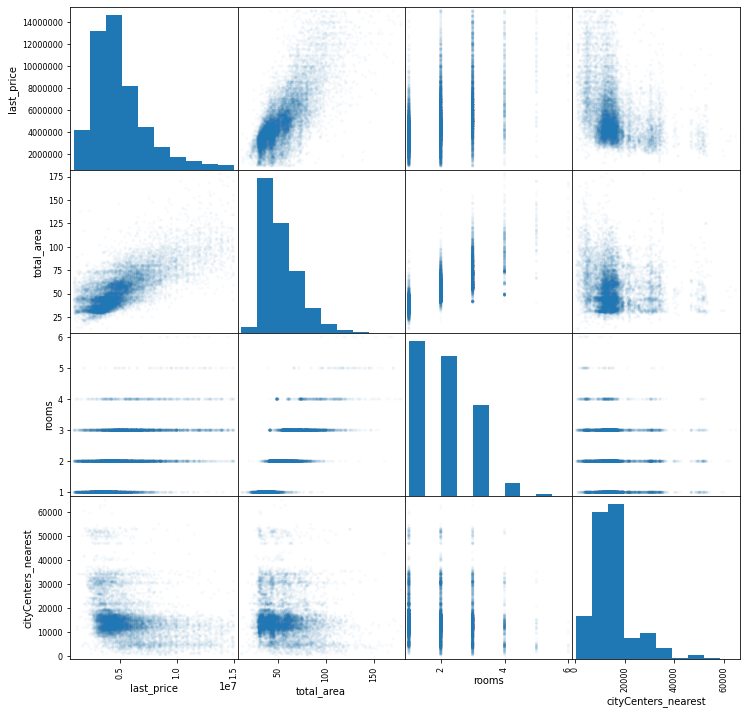

In [44]:
# Let's build a scatter matrix to look at all the parameters at once
list_of_columns = ['last_price','total_area','rooms','cityCenters_nearest']
pd.plotting.scatter_matrix(df[list_of_columns], figsize=(12, 12), alpha = 0.03)

<AxesSubplot:xlabel='rooms'>

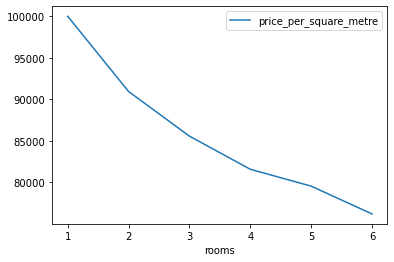

In [45]:
# Let's group the data by the number of rooms according to the price per square meter
pivot_table_df = df.pivot_table(index = 'rooms', values = 'price_per_square_metre',aggfunc = 'median')
pivot_table_df.plot()

In [46]:
# Let's calculate the correlation for these parameters
for value in list_of_columns:
    print(value, df['last_price'].corr(df[value]))

last_price 0.9999999999999998
total_area 0.741170610933254
rooms 0.470809273580349
cityCenters_nearest -0.32583005595493664


**Conclusion**

From the graph and the correlation coefficient, it is clear that:

- the larger the area, the higher the price of the property;
- the most common are one-bedroom, two-bedroom, and three-bedroom apartments. The more rooms (up to three), the higher the price. However, the price per square meter decreases with an increase in the number of rooms;
- the further from the center, the cheaper the apartment, and most of the apartments are offered within the range of 10 to 20 km from the center.

Let's examine the dependence of the price on the floor on which the apartment is located: first, last, or another.

<AxesSubplot:xlabel='flat_floor'>

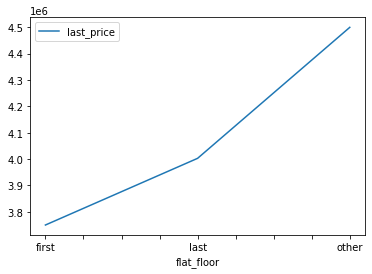

In [47]:
# Let's group the data by floors
pivot_table_df = df.pivot_table(index = 'flat_floor', values = 'last_price',aggfunc = 'median')
pivot_table_df.plot()

The cheapest apartments are on the first floor, the most expensive - on other floors.

Let's study the dependence on the date of posting: day of the week, month, and year.

<AxesSubplot:xlabel='day_of_exposition'>

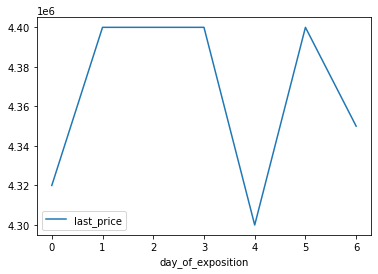

In [48]:
# Let's group the data by days of the week
pivot_table_df = df.pivot_table(index = 'day_of_exposition', values = 'last_price',aggfunc = 'median')
pivot_table_df.plot()

It seems that the cheapest apartments are sold on Fridays, and the most expensive on Tuesdays, Wednesdays, Thursdays, and Saturdays.

<AxesSubplot:xlabel='month_of_exposition'>

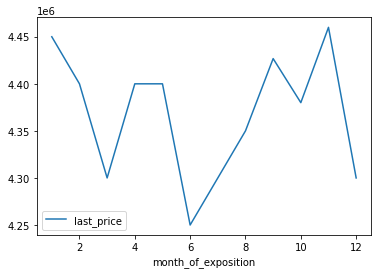

In [49]:
# Let's group the data by months
pivot_table_df = df.pivot_table(index = 'month_of_exposition', values = 'last_price',aggfunc = 'median')
pivot_table_df.plot()

The graph shows that the most expensive apartments are sold at the beginning of the year and closer to the end of autumn, while the cheapest are sold in the middle of the year.

<AxesSubplot:xlabel='year_of_exposition'>

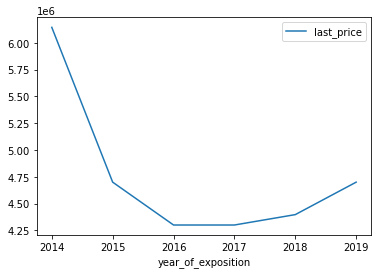

In [50]:
# Let's group the data by years
pivot_table_df = df.pivot_table(index = 'year_of_exposition', values = 'last_price',aggfunc = 'median')
pivot_table_df.plot()

From 2014 to 2016 the market significantly dropped in price, but after that, it began to gradually increase.

**Conclusion**

* The cheapest apartments are on the first floor - which is understandable: the first floors are usually occupied by various shops and salons, and living in such an environment is not very pleasant, so many prefer to live higher up. However, not on the last floor, since "another" floor is more expensive. This can also be related to the fact that on higher floors the water pressure in the pipes can be lower, if the elevator breaks, you will have to walk up very high, but undoubtedly, the view must be beautiful.
* The most expensive apartments are sold at the beginning and the end of the year - possibly, this is the peak time for sales - people are eager to start life anew, or receive an annual bonus and start buying apartments. Demand creates supply, and the price may change upwards. In the middle of the year, there's a lull, everyone is on vacation, then it's not the time for apartments.
* After experiencing a price peak in 2014, the real estate market slowed down by 2016 - possibly, the global crisis of 2014 had an impact. However, after that, the price started to slowly increase and, undoubtedly, at present could well have beaten the 2014 record.

## Calculating the average price per square meter in the 10 localities with the highest number of listings.

In [51]:
# Let's select 10 localities with the highest number of listings
df['locality_name'].value_counts().head(10)

Санкт-Петербург      10767
посёлок Мурино         444
посёлок Шушары         360
Всеволожск             292
Колпино                266
Пушкин                 260
посёлок Парголово      257
деревня Кудрово        245
Гатчина                230
Выборг                 163
Name: locality_name, dtype: int64

It is evident that the list of the most popular localities is led by Saint Petersburg. However, there is a chance that not all localities are accounted for in the list, as the same locality might have been recorded as a town or simply as a settlement. Therefore, let's count the names ourselves.

In [52]:
df['locality_name'].fillna('unknown', inplace=True)

In [53]:
# Create a separate list, where we will enter the names of all localities
list_of_names = []
# Add to the list the localities from the 'locality_name' column
list_of_names = df['locality_name'].tolist()
# We will separate any extra words starting with a
# lowercase letter from the names and display a new list
df.loc[:,'new_names'] = [' '.join(w for w in a.split() if w.lower() != w)  for a in list_of_names]
df['new_names'].value_counts().head(10)

Санкт-Петербург    10767
Мурино               477
Кудрово              369
Шушары               360
Всеволожск           292
Колпино              266
Пушкин               260
Парголово            257
Гатчина              230
Выборг               163
Name: new_names, dtype: int64

It turns out there are more listings in Kudrovo than in Shushary.

In [54]:
# Let's calculate the average price per square meter in these localities
new_pivot = df.pivot_table(index = 'new_names', values = 'price_per_square_metre', aggfunc = ['count','median'])
new_pivot.columns = ['count', 'price_per_square_metre']
new_pivot.sort_values(by = 'count', ascending = False).head(10)

,count,price_per_square_metre
new_names,,
Санкт-Петербург,10767,101333.333333
Мурино,477,84239.130435
Кудрово,369,93714.285714
Шушары,360,75933.553427
Всеволожск,292,65054.507353
Колпино,266,74256.465517
Пушкин,260,97478.813559
Парголово,257,92051.282051
Гатчина,230,66869.918699


In [55]:
# Find the locality with the highest cost of housing
df.loc[df['last_price'].idxmax()]

total_images                               10
last_price                           15000000
total_area                               95.0
first_day_exposition      2017-06-27 00:00:00
rooms                                       3
ceiling_height                           2.75
floors_total                               20
living_area                              53.0
floor                                       1
is_apartment                              NaN
studio                                  False
open_plan                               False
kitchen_area                             16.0
balcony                                     0
locality_name                 Санкт-Петербург
airports_nearest                      40417.0
cityCenters_nearest                   12120.0
parks_around3000                          2.0
parks_nearest                           159.0
ponds_around3000                          0.0
ponds_nearest                           503.0
days_exposition                   

In [56]:
# Find the locality with the lowest cost of housing
df.loc[df['last_price'].idxmin()]

total_images                                2
last_price                             900000
total_area                               42.8
first_day_exposition      2017-06-14 00:00:00
rooms                                       2
ceiling_height                           2.55
floors_total                                5
living_area                              32.0
floor                                       5
is_apartment                              NaN
studio                                  False
open_plan                               False
kitchen_area                              5.0
balcony                                     0
locality_name                       Сясьстрой
airports_nearest                          NaN
cityCenters_nearest                       NaN
parks_around3000                          NaN
parks_nearest                             NaN
ponds_around3000                          NaN
ponds_nearest                             NaN
days_exposition                   

**Conclusion**

In the top ten most popular listings, the first place is taken by Saint Petersburg as the center of Leningrad Oblast, with Vyborg closing the list.
Also, the most expensive housing is found in Saint Petersburg, while the most advantageous real estate purchase is in Syasstroy - just 144 km away from Petersburg.

## Identifying the Area That Falls Within the Center

<AxesSubplot:xlabel='cityCenters_km'>

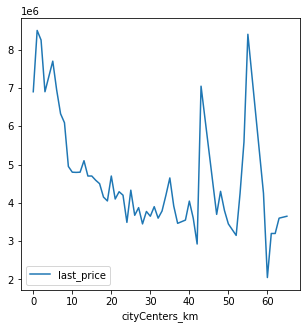

In [57]:
# Let's round the distance to the center to kilometers
#and record it in a new column 'cityCenters_km'
df['cityCenters_km'] = round(df['cityCenters_nearest'] / 1000)

# Group by distance to the center
pivot_km = df.pivot_table(index='cityCenters_km', values= 'last_price', aggfunc='median')
pivot_km.plot(figsize=(5,5))

**Conclusion**

The graph increases up to approximately 3 km, and then starts to fall sharply. We will select this range as the boundaries of the center of Saint Petersburg.

## Analysis of the Apartment Segment in the Center

First, let's examine parameters such as: area, price, number of rooms, and ceiling height.

In [58]:
# Let's select only those apartments that are located less than three kilometers from the center.
rich_df = df[(df['cityCenters_km'] < 3)]
rich_df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,price_per_square_metre,day_of_exposition,month_of_exposition,year_of_exposition,flat_floor,living_to_total_area,kitchen_to_total_area,new_names,cityCenters_km
24,8,6500000,97.2,2015-10-31,2,2.80,3,46.500000,1,NaN,...,265,66872.427984,5,10,2015,first,0.478395,0.201646,Санкт-Петербург,2.0
433,15,6800000,57.8,2017-04-28,3,2.80,5,33.700000,4,NaN,...,402,117647.058824,4,4,2017,other,0.583045,0.167820,Санкт-Петербург,1.0
502,0,11250000,71.0,2017-01-26,2,2.80,3,43.000000,3,NaN,...,35,158450.704225,3,1,2017,last,0.605634,0.112676,Санкт-Петербург,1.0
555,13,7680000,83.1,2017-05-13,3,2.80,3,50.900000,3,NaN,...,228,92418.772563,5,5,2017,last,0.612515,0.123947,Санкт-Петербург,2.0
872,10,8200000,64.0,2017-06-02,2,2.70,2,39.000000,2,NaN,...,160,128125.000000,4,6,2017,last,0.609375,0.156250,Санкт-Петербург,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22414,4,8280000,97.0,2016-12-04,3,2.80,3,65.000000,2,NaN,...,208,85360.824742,6,12,2016,other,0.670103,0.092784,Санкт-Петербург,2.0
22533,11,9000000,69.5,2017-06-27,4,2.70,4,50.300000,4,NaN,...,21,129496.402878,1,6,2017,last,0.723741,0.086331,Санкт-Петербург,1.0
22968,7,6700000,54.0,2017-11-08,3,2.80,3,36.000000,2,NaN,...,210,124074.074074,2,11,2017,other,0.666667,0.185185,Санкт-Петербург,2.0
23077,10,12500000,107.0,2017-09-25,4,2.55,5,68.531722,4,NaN,...,229,116822.429907,0,9,2017,other,0.640483,0.111782,Санкт-Петербург,2.0


count    166.000000
mean      73.940301
std       25.786718
min       12.000000
25%       54.250000
50%       71.500000
75%       92.000000
max      165.000000
Name: total_area, dtype: float64


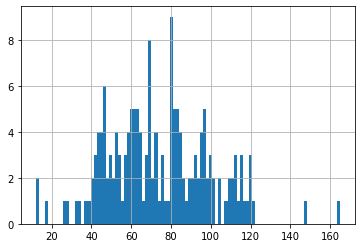

count    1.660000e+02
mean     8.324904e+06
std      2.734138e+06
min      2.400000e+06
25%      6.462500e+06
50%      8.265000e+06
75%      9.750000e+06
max      1.500000e+07
Name: last_price, dtype: float64


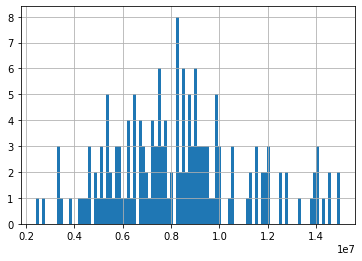

count    166.000000
mean       2.656627
std        1.019292
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        6.000000
Name: rooms, dtype: float64


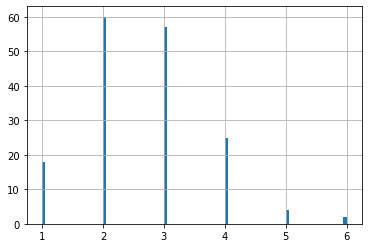

count    166.000000
mean       2.809096
std        0.187254
min        2.500000
25%        2.562500
50%        2.800000
75%        3.000000
max        3.000000
Name: ceiling_height, dtype: float64


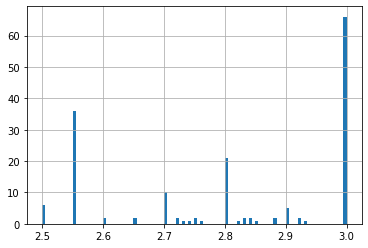

In [59]:
# Create a list of columns to study
list_of_columns = ['total_area', 'last_price', 'rooms','ceiling_height']
# For each column, we will build a histogram and look at the spread
for value in list_of_columns:
    rich_df[value].hist(bins = 100)
    print(rich_df[value].describe())
    plt.show()

The histograms look more "fluffy" than those built from all the data in the table, but the general trend can be observed.

Now let's identify factors that affect the price of an apartment (number of rooms, floor, distance from the center, date of posting).

array([[<AxesSubplot:xlabel='last_price', ylabel='last_price'>,
        <AxesSubplot:xlabel='rooms', ylabel='last_price'>,
        <AxesSubplot:xlabel='cityCenters_nearest', ylabel='last_price'>],
       [<AxesSubplot:xlabel='last_price', ylabel='rooms'>,
        <AxesSubplot:xlabel='rooms', ylabel='rooms'>,
        <AxesSubplot:xlabel='cityCenters_nearest', ylabel='rooms'>],
       [<AxesSubplot:xlabel='last_price', ylabel='cityCenters_nearest'>,
        <AxesSubplot:xlabel='rooms', ylabel='cityCenters_nearest'>,
        <AxesSubplot:xlabel='cityCenters_nearest', ylabel='cityCenters_nearest'>]],
      dtype=object)

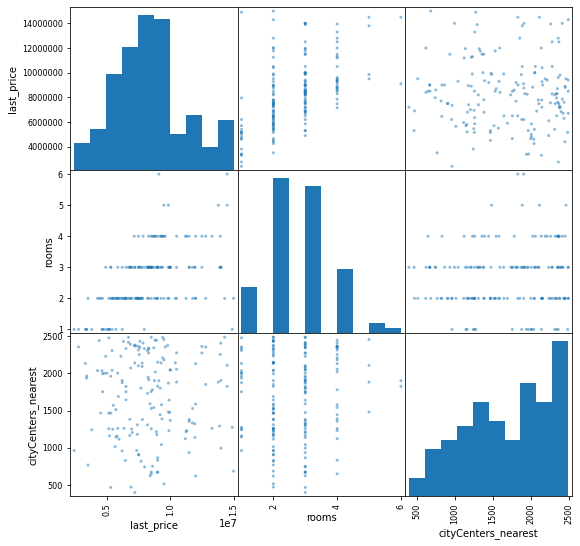

In [60]:
pd.plotting.scatter_matrix(rich_df[['last_price','rooms','cityCenters_nearest']], figsize=(9, 9))

The more rooms, the more expensive the housing. There is no specific direction of data distribution in terms of distance from the center.

In [61]:
# Create a function that groups each value 
#from the list of columns and returns 
#a plot with the median price
def rich(value):
    pivot_df = rich_df.pivot_table(index = value, values = 'last_price',aggfunc = 'median')
    return pivot_df.plot()

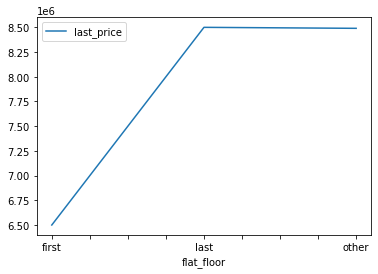

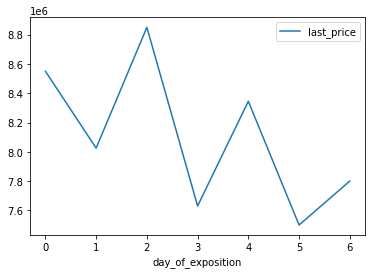

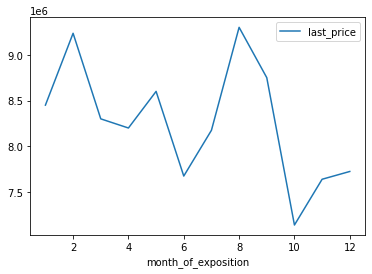

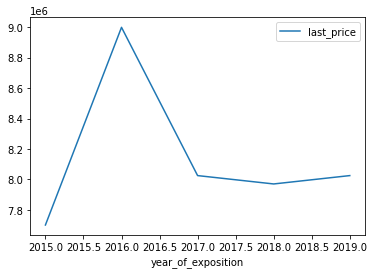

In [62]:
# Build a histogram for each column from the list of columns
list_of_columns = ['flat_floor', 'day_of_exposition', 'month_of_exposition', 'year_of_exposition']
for value in list_of_columns:
    rich(value)
    plt.show()

The first floor is the cheapest, the most expensive apartments are sold on Wednesdays, at the beginning of the year and in summer; and the peak of prices was in 2016.

**Conclusion**

* The area of apartments according to all data is 50 sq.m., while in the center of Saint Petersburg it is 70 sq.m., and accordingly, there are more rooms on average in the center (3 rooms) than in the entire dataset (2 rooms). The prices differ by approximately 4 million, and the ceiling height tends to be 3 meters, which is not surprising since the city center mostly consists of old buildings where ceilings were built to be maximally high.
* People living in the center are also reluctant to take apartments on the first floor. Also, in the center, there is not such a dependency of distance from the square as in the entire segment of properties, where the closer to the center, the more expensive the apartment.
* Apartments in the center are most often sold on Wednesdays, at the beginning of the year, and in the summer, unlike the overall data, where summer is the time with the lowest price levels. Unlike the peak prices of 2014 for all apartments, properties in the center only became more expensive by 2016.

# General Conclusion

Having processed a database consisting of various parameters about apartments in Saint Petersburg and the surrounding area, it was possible to establish:

1. Missing entries were found and filled, and rare and outlier values were found and processed (zero number of rooms in an apartment, ceilings of one meter and a hundred meters, as well as apartments for $12,300);
2.The normal sale period is within 45 to 232 days;
3. From 2016 to 2019, there is a trend towards a reduction in the number of days of sale, which may be the result of the increasing popularity of internet resources leading to a faster transaction;
4. It was established that the larger the area, the higher the price of the property; however, the price per square meter decreases with an increase in the number of rooms;
5. As the distance from the center increases, the apartment becomes cheaper, and the majority of apartments are presented in the range of 10 to 20 km from the center.
6. The boundaries of the center of Saint Petersburg can be defined by an area with a radius of 3 km;
7. It was found out that the cheapest apartments are located on the first floors. Also, people are not particularly keen to buy apartments on the last floors, preferring others;
8. In comparison with the general trend of selling expensive apartments in the winter period (at the end and beginning of the year), apartments in the center also have a high price in the summer;
9. While on average the peak of real estate prices was observed in 2014, apartments in the center only gained popularity by 2016, subsequently changing from growth to decline;
10. The day of the week and ceiling height have a negligible effect on the cost of the property, while the distance from the center, floor, and area have a greater impact on the price.